In [3]:
%load_ext autoreload
%autoreload 2

import os
import cv2
import matplotlib.pyplot as plt
from attention.img_proc.img_process import *
from attention.img_proc.img_split import *
from attention.models.face_models import *
from attention.utils.img_plot import *
import copy

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [4]:
image_name = 'frame_0.png'
image_path = os.path.join(os.path.expanduser('~'), "Desktop", "origin",image_name)
output_path = os.path.join(os.path.expanduser('~'), "Desktop", "origin-face-result")

In [5]:
image_path

'/Users/lancelotbosseler/Desktop/origin/frame_0.png'

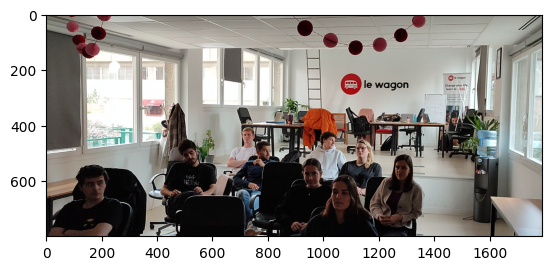

In [62]:
image = cv2_process(image_path)
plt.imshow(image)

In [63]:
n_split_w = 12
n_split_h = 12
crops = split_image(image, n_split_w, n_split_h, 0.02, 0.02)
# show_crops(crops)

In [64]:
bbox_crop_list = []
bbox_crop_list_origin = []
for crop in crops:
    coord_set = detect_face(crop.image)
    bbox_crop_list.append(coord_set)
    coord_set_origin = reconstruct_coord(crop, coord_set)
    bbox_crop_list_origin.append(coord_set_origin)
bbox_crop_list_origin

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'x1': 1093, 'x2': 1138, 'y1': 122, 'y2': 158}],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'x1': 1435, 'x2': 1462, 'y1': 351, 'y2': 369},
  {'x1': 1456, 'x2': 1495, 'y1': 370, 'y2': 399}],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'x1': 698, 'x2': 750, 'y1': 422, 'y2': 463}],
 [],
 [{'x1': 1002, 'x2': 1057, 'y1': 439, 'y2': 484}],
 [{'x1': 1015, 'x2': 1051, 'y1': 442, 'y2': 482}],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'x1': 484, 'x2': 547, 'y1': 484, 'y2': 542}],
 [],
 [{'x1': 771, 'x2': 824, 'y1': 477, 'y2': 528}],
 [{'x1': 1000, 'x2': 1068, 'y1': 427, 'y2': 478}],
 [{'x1': 1108, 'x2': 1162, 'y1': 470, 'y2': 517}],
 [{'x1': 1252, 'x2': 1316, 'y1': 527, 'y2': 589}],
 [],
 [],
 [],
 [],
 [{'x1': 13

In [65]:
crops_annotated = []
for i in range(len(crops)):
    crop_annotated = copy.copy(crops[i])
    crop_annotated.image = output_image_bboxes(crop_annotated.image, bbox_crop_list[i])
    crops_annotated.append(crop_annotated)
# show_crops(crops_annotated)

In [66]:
bbox_list = bbox_merge(bbox_crop_list_origin)
bbox_list

[{'x1': 1093, 'x2': 1138, 'y1': 122, 'y2': 158},
 {'x1': 1435, 'x2': 1462, 'y1': 351, 'y2': 369},
 {'x1': 1456, 'x2': 1495, 'y1': 370, 'y2': 399},
 {'x1': 698, 'x2': 750, 'y1': 422, 'y2': 463},
 {'x1': 484, 'x2': 547, 'y1': 484, 'y2': 542},
 {'x1': 771, 'x2': 824, 'y1': 477, 'y2': 528},
 {'x1': 1000, 'x2': 1068, 'y1': 427, 'y2': 478},
 {'x1': 1108, 'x2': 1162, 'y1': 470, 'y2': 517},
 {'x1': 1252, 'x2': 1316, 'y1': 527, 'y2': 589},
 {'x1': 132, 'x2': 219, 'y1': 581, 'y2': 673},
 {'x1': 919, 'x2': 991, 'y1': 551, 'y2': 622},
 {'x1': 1016, 'x2': 1106, 'y1': 620, 'y2': 707}]

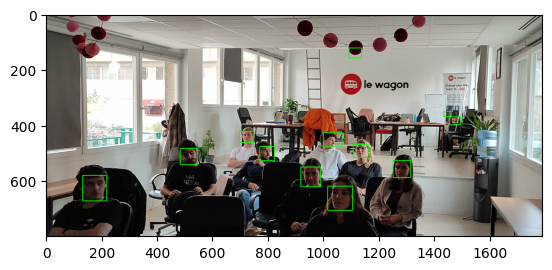

In [67]:
image_output = output_image_bboxes(image, bbox_list)
plt.imshow(image_output)

In [68]:
image_output_rgb = cv2.cvtColor(image_output, cv2.COLOR_RGB2BGR)

cv2.imwrite(os.path.join(output_path, image_name), image_output_rgb)

True